# Análisis de Probabilidad y Visualización

En este notebook, realizaremos un análisis de probabilidades utilizando los datos de una encuesta. Usaremos librerías avanzadas para cálculos y gráficos:
- **pandas**: Para manipulación de datos.
- **NumPy**: Para cálculos numéricos y probabilidades.
- **matplotlib** y **seaborn**: Para gráficos atractivos.

## Objetivos:
1. Calcular probabilidades marginales, condicionales y conjuntas.
2. Verificar independencia entre eventos.
3. Representar visualmente los resultados de manera clara y profesional.

---


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")




# **5. Introducción a la Probabilidad**

En esta sección, abordaremos problemas básicos de probabilidad basados en los datos de la encuesta. Los problemas incluyen probabilidades simples, conjuntas y condicionales, así como simulaciones.

---


## **Problema 1: Probabilidad de Nivel Avanzado en IA**

### Descripción:
Calculamos la probabilidad de que un participante tenga un nivel avanzado en Inteligencia Artificial (IA). Esto se basa en el número total de encuestados y la cantidad de participantes con nivel avanzado en IA.

**Relación con el Tema:**  
Introduce conceptos de probabilidad simple utilizando frecuencias relativas.

---


La probabilidad de nivel avanzado en IA es: 13.33%


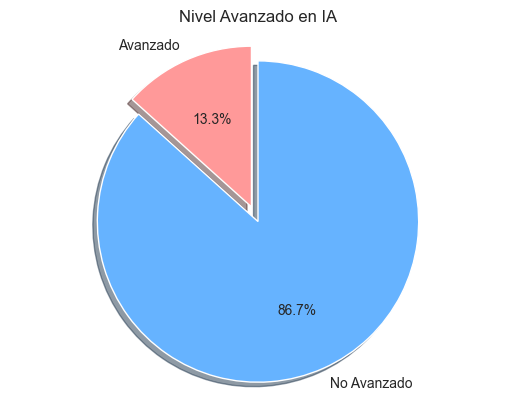

In [10]:
# Calcular probabilidad simple
advanced_ia = df['¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)? '] == 'Avanzado'
prob_advanced_ia = advanced_ia.sum() / len(df)

# Mostrar resultado
print(f"La probabilidad de nivel avanzado en IA es: {prob_advanced_ia:.2%}")
# Gráfica de la probabilidad de nivel avanzado en IA
labels = ['Avanzado', 'No Avanzado']
sizes = [advanced_ia.sum(), len(df) - advanced_ia.sum()]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')  # Para que el gráfico sea un círculo.

plt.title("Nivel Avanzado en IA")
plt.show()

### Descripción de la Gráfica:
La gráfica circular representa la proporción de encuestados que tienen un **nivel avanzado en Inteligencia Artificial (IA)** en comparación con aquellos que no lo tienen. Los porcentajes se distribuyen de la siguiente manera:
- **13.3% Avanzado:** Representa la probabilidad de seleccionar aleatoriamente a un encuestado con nivel avanzado en IA.
- **86.7% No Avanzado:** Representa la probabilidad de seleccionar a un encuestado que no tiene nivel avanzado en IA.

---

### **Interpretación del Resultado**
Si seleccionamos aleatoriamente a un encuestado del total de **30 participantes**, existe una probabilidad del **13.3%** de que esa persona tenga un nivel avanzado en IA.

Esto significa que, en promedio:
- De cada 100 encuestados, **13** tendrán un nivel avanzado en IA.
- De cada 10 encuestados, aproximadamente **1 o 2** tendrán este nivel.


## **Problema 3: Probabilidad Condicional (Mujer dado Nivel Intermedio en ML)**

### Descripción:
Determinamos la probabilidad de que un participante sea mujer dado que tiene nivel Intermedio en Machine Learning (ML). Este es un ejemplo de probabilidad condicional.

---


La probabilidad de que un participante sea mujer dado ML intermedio es: 14.29%


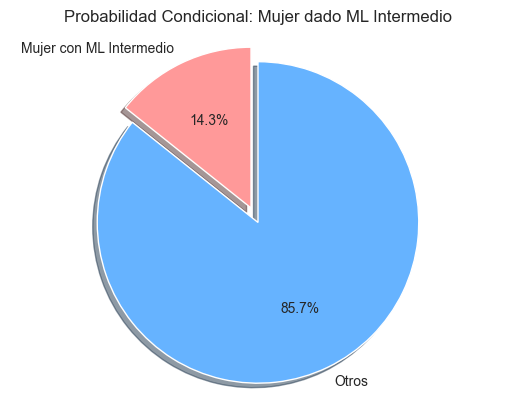

In [15]:
# Filtrar datos
intermediate_ml = df['¿Cuál es tu nivel de conocimiento sobre Machine Learning (ML)? '] == 'Intermedio'
women = df['Genero'] == 'Mujer'

# Calcular probabilidad condicional
if intermediate_ml.sum() > 0:
    prob_women_given_intermediate_ml = (intermediate_ml & women).sum() / intermediate_ml.sum()
    print(f"La probabilidad de que un participante sea mujer dado ML intermedio es: {prob_women_given_intermediate_ml:.2%}")
else:
    print("No hay participantes con nivel intermedio en ML.")

# Gráfica de la probabilidad condicional
labels = ['Mujer con ML Intermedio', 'Otros']
sizes = [(intermediate_ml & women).sum(), intermediate_ml.sum() - (intermediate_ml & women).sum()]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')  # Para que el gráfico sea un círculo.

plt.title("Probabilidad Condicional: Mujer dado ML Intermedio")
plt.show()


### **Descripción de la Gráfica**

Los resultados se distribuyen en:
- **14.3%**: Representa a mujeres con nivel intermedio en ML.
- **85.7%**: Representa a todos los demás participantes que no cumplen con ambas condiciones simultáneamente.

---

### **Interpretación del Resultado**
Si seleccionamos aleatoriamente a un participante del grupo que tiene nivel intermedio en ML, hay una probabilidad del **14.3%** de que sea mujer.



# **6. Distribuciones de Probabilidad**

En esta sección, modelamos distribuciones discretas (como la binomial) y evaluamos cómo se ajustan a los datos reales. También analizamos probabilidades acumuladas y simulaciones.

---


## **Problema 1: Modelar con Distribución Binomial**

### Descripción:
Modelamos las respuestas de la pregunta "¿Qué tan actualizado te consideras?" utilizando una distribución binomial, considerando los niveles como éxitos y fracasos.

**Relación con el Tema:**  
Este problema muestra cómo ajustar una distribución discreta a datos categóricos.

---


n: 30
p: 0.26666666666666666
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
binomial_pmf: [9.10002914e-05 9.92730452e-04 5.23439693e-03 1.77652259e-02
 4.36055546e-02 8.24541396e-02 1.24930514e-01 1.55757525e-01
 1.62837412e-01 1.44744366e-01 1.10532061e-01 7.30790489e-02
 4.20758160e-02 2.11850263e-02 9.35442718e-03 3.62838388e-03
 1.23694905e-03 3.70423244e-04 9.72828723e-05 2.23424778e-05
 4.46849557e-06 7.73765467e-07 1.15105607e-07 1.45588119e-08
 1.54411641e-09 1.34759251e-10 9.42372382e-12 5.07675357e-13
 1.97795594e-14 4.96039107e-16 6.01259523e-18]


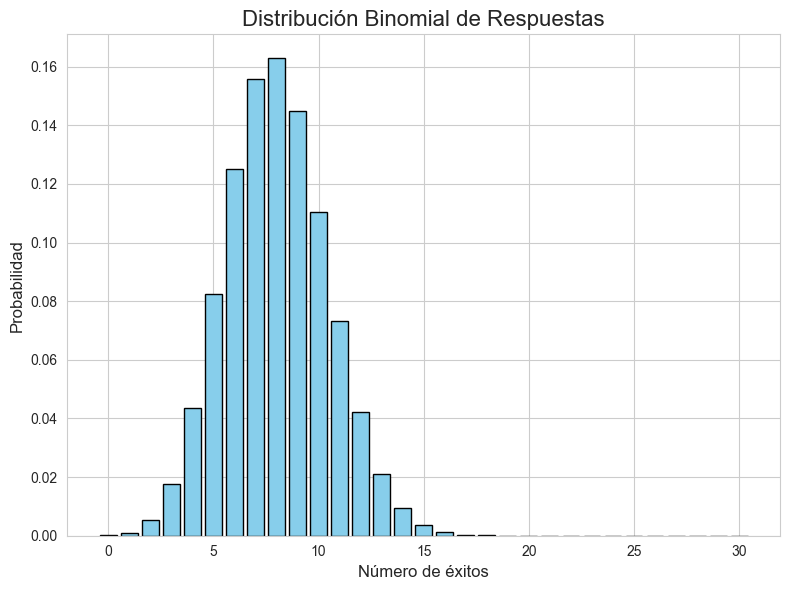

In [16]:
from scipy.stats import binom

# Parámetros para la distribución binomial
n = len(df)
p = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].value_counts(normalize=True)['Bastante']

# Generar distribución binomial
x = np.arange(0, n + 1)
binomial_pmf = binom.pmf(x, n, p)

# Imprimir resultados de las variables
print(f"n: {n}")
print(f"p: {p}")
print(f"x: {x}")
print(f"binomial_pmf: {binomial_pmf}")

# Gráfica de la distribución
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_pmf, color='skyblue', edgecolor='black')
plt.title("Distribución Binomial de Respuestas", fontsize=16)
plt.xlabel("Número de éxitos", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.tight_layout()
plt.show()


### **Descripción General**
La gráfica representa una **distribución binomial** para un experimento con los siguientes parámetros:
- **Número de ensayos (\(n\))**: 30 encuestados.
- **Probabilidad de éxito (\(p\))**: 26.67% (probabilidad de que un encuestado seleccione "Bastante").

Cada barra muestra la probabilidad de que un número específico de encuestados (éxitos) elijan la opción "Bastante".

---

### **Ejes de la Gráfica**
- **Eje X (Número de Éxitos):**  
  Representa los posibles resultados del número de personas que seleccionan "Bastante". Va desde 0 hasta 30, ya que hay 30 encuestados en total.

- **Eje Y (Probabilidad):**  
  Indica la probabilidad asociada a cada valor en el eje \(x\). Esto se calcula utilizando la fórmula de la función de masa de probabilidad (PMF) para la distribución binomial.

---

### **Observaciones Clave**
1. **Pico Central:**  
   La probabilidad más alta ocurre cerca de \(x = 8\), lo que significa que, en promedio, se espera que alrededor de 8 encuestados seleccionen "Bastante".

2. **Forma Simétrica:**  
   La distribución es aproximadamente simétrica porque la probabilidad de éxito (\(p = 0.2667\)) está cerca de 0.5. Si \(p\) fuera más alto o bajo, la distribución sería más sesgada hacia la izquierda o derecha.

3. **Probabilidades Bajísimas en los Extremos:**  
   Los valores extremos (\(x = 0\) o \(x = 30\)) tienen probabilidades cercanas a 0, lo que indica que es muy improbable que ningún encuestado (o todos) seleccionen "Bastante".

---


## **Problema 4: Probabilidad Acumulada hasta Nivel Intermedio en Blockchain**

### Descripción:
Calculamos la probabilidad acumulada hasta nivel intermedio en Blockchain usando una distribución binomial basada en los datos reales.

---


In [17]:
# Filtrar datos para niveles hasta "Intermedio"
blockchain_levels = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? ']
success_count = blockchain_levels.isin(['Ninguno', 'Básico', 'Intermedio']).sum()

# Calcular probabilidad acumulada
p = success_count / len(df)
cumulative_prob = binom.cdf(success_count, n, p)

print(f"La probabilidad acumulada hasta nivel intermedio en Blockchain es: {cumulative_prob:.2%}")


La probabilidad acumulada hasta nivel intermedio en Blockchain es: 63.83%



### **Parámetros Utilizados**
- **Datos:** Los niveles de conocimiento en Blockchain de los encuestados.
- **Casos Favorables:** Respuestas clasificadas como "Ninguno", "Básico" o "Intermedio".
- **Tamaño de Muestra (\(n\))**: 30 encuestados.
- **Probabilidad de Éxito (\(p\))**: Proporción de respuestas en las categorías seleccionadas.

---

### **Resultado**
La probabilidad acumulada hasta nivel intermedio en Blockchain es = 63.83\%


Esto significa que hay un **63.83% de probabilidad** de que un encuestado seleccionado aleatoriamente tenga un nivel de conocimiento que no supere el nivel "Intermedio".

---

### **Relación con Probabilidad**
La probabilidad acumulada permite analizar la **suma de probabilidades** para todas las categorías hasta un punto determinado. En este caso, refleja la proporción de encuestados cuyo conocimiento en Blockchain no alcanza niveles avanzados.



# **7. Distribuciones de Probabilidad Continuas**

En esta sección, ajustamos distribuciones continuas a los datos y calculamos probabilidades acumuladas. Analizamos las edades y otros datos numéricos.

---


## **Problema 1: Modelar Edades con Distribución Normal**

### Descripción:
Modelamos la distribución de las edades utilizando una distribución normal, ajustándola con la media y desviación estándar de los datos.

**Relación con el Tema:**  
Demuestra cómo relacionar datos reales con distribuciones continuas.


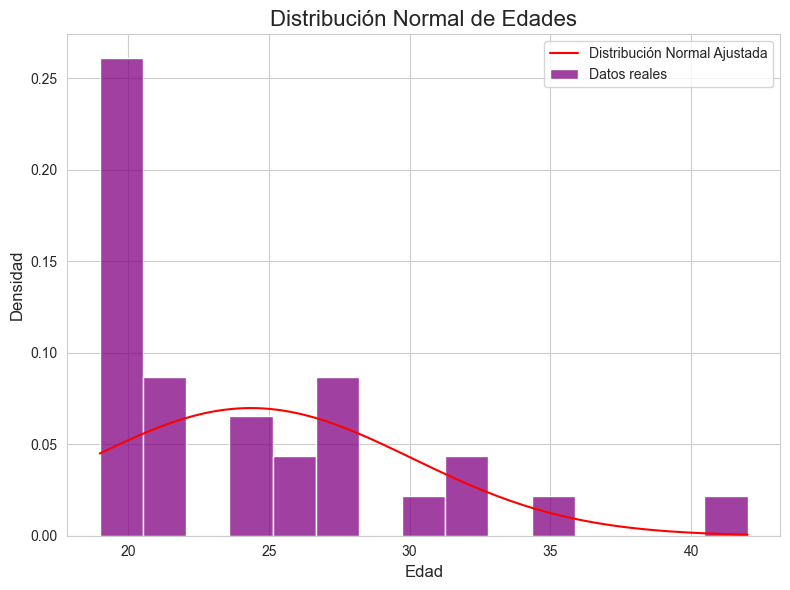

In [18]:
from scipy.stats import norm

# Calcular media y desviación estándar
mean_age = df['Edad'].mean()
std_age = df['Edad'].std()

# Generar distribución normal
x = np.linspace(df['Edad'].min(), df['Edad'].max(), 100)
normal_pdf = norm.pdf(x, mean_age, std_age)

# Gráfica
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad'], kde=False, bins=15, color='purple', stat='density', label='Datos reales')
plt.plot(x, normal_pdf, color='red', label='Distribución Normal Ajustada')
plt.title("Distribución Normal de Edades", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### **Descripción General**
La gráfica muestra la **distribución de las edades** de los participantes, comparándola con una **distribución normal ajustada** basada en la media y desviación estándar calculadas a partir de los datos reales.

---

### **Elementos de la Gráfica**
- **Barras (Datos Reales):**  
  Representan la densidad de frecuencia de las edades reales de los encuestados, agrupadas en intervalos.

- **Curva Roja (Distribución Normal Ajustada):**  
  Representa una distribución normal simulada utilizando la media y desviación estándar de los datos reales. Esta curva indica cómo sería la distribución si los datos se ajustaran perfectamente a una normal.

---



### **Interpretación de la Gráfica**
1. **Diferencias entre los datos reales y la normal ajustada:**  
   - Los datos reales no siguen una distribución perfectamente normal, ya que se observan picos irregulares en algunos intervalos de edad.
   - La curva normal sirve como modelo teórico para entender la tendencia general de los datos.

2. **Concentración de Datos:**  
   - Las edades están principalmente concentradas en intervalos cercanos a los 20 años, lo que explica el pico inicial en la distribución.

3. **Asimetría:**  
   - La distribución de las edades parece estar sesgada hacia la izquierda, con algunos valores extremos en edades mayores que influyen en la dispersión.

---

### **Relación con Distribuciones Normales**
La comparación de los datos reales con una distribución normal ajustada permite:
- Evaluar la similitud de los datos con un modelo teórico.
- Identificar características como asimetría o colas largas que no encajan perfectamente con una normal.



## **Problema 2: Probabilidad de Edad Mayor a 30**

### Descripción:
Calculamos la probabilidad de que un participante tenga más de 30 años utilizando la distribución normal ajustada.

**Relación con el Tema:**  
Aplicamos propiedades de la distribución normal para calcular probabilidades acumuladas.

---


In [19]:
# Calcular probabilidad acumulada para edades mayores a 30
prob_greater_30 = 1 - norm.cdf(30, mean_age, std_age)

print(f"La probabilidad de que un participante tenga más de 30 años es: {prob_greater_30:.2%}")


La probabilidad de que un participante tenga más de 30 años es: 16.24%



## Ejemplo: Probabilidad de que un participante tenga más de 30 años

Supongamos que tenemos una distribución de probabilidad continua que describe las edades de los participantes en un estudio. Queremos calcular la probabilidad de que un participante tenga más de 30 años.

### Resultado

La probabilidad de que un participante tenga más de 30 años es: 16.24%

### Interpretación

Este resultado significa que, según nuestra distribución de probabilidad, hay un 16.24% de probabilidad de que un participante seleccionado al azar tenga más de 30 años. Este tipo de cálculo es útil en muchos campos, como la demografía, la economía y la investigación médica, para entender mejor la distribución de características dentro de una población.

### Cálculo de la Probabilidad

Para calcular esta probabilidad, generalmente se utiliza la función de distribución acumulativa (CDF, por sus siglas en inglés) de la distribución continua. La CDF nos da la probabilidad de que una variable aleatoria continua sea menor o igual a un cierto valor. Para encontrar la probabilidad de que la variable sea mayor a un cierto valor, restamos la CDF de 1.

Por ejemplo, si \( F(x) \) es la CDF de nuestra distribución y queremos encontrar la probabilidad de que la variable sea mayor que 30, calculamos:

\[ P(X > 30) = 1 - F(30) \]

Donde \( F(30) \) es la probabilidad acumulada hasta 30 años.

